In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import date, datetime
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle

In [2]:
# Read the csv files into a pandas DataFrame
train = pd.read_csv('master_train.csv')
test = pd.read_csv('master_test.csv')

In [3]:
test.head()

,Unnamed: 0,id,belongs_to_collection_True,budget,language_enc,popularity,status_Released,year,month,Action,...,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt
0,0,3001,1,0,0,3.851534,1,2007.0,7.0,0,...,2,0,2,7,2,9,2,120,0,23
1,1,3002,0,88000,1,3.559789,1,2058.0,5.0,0,...,1,1,1,10,8,18,8,185,5,161
2,2,3003,0,0,1,8.085194,1,1997.0,5.0,0,...,1,3,1,9,10,19,4,128,44,68
3,3,3004,0,6800000,2,8.596012,1,2010.0,9.0,0,...,2,3,3,23,69,92,15,611,38,263
4,4,3005,0,2000000,1,3.217680,1,2005.0,2.0,0,...,1,0,1,4,14,18,4,84,0,56


In [4]:
train.head()

,Unnamed: 0,id,belongs_to_collection_True,budget,language_enc,popularity,status_Released,year,month,Action,...,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt,revenue
0,0,1,1,14000000,0,6.575393,1,2015,2,0,...,3,1,24,72,96,4,597,19,80,12314651
1,1,2,1,40000000,0,8.248895,1,2004,8,0,...,1,1,20,9,29,4,385,0,53,95149435
2,2,3,0,3300000,0,64.299990,1,2014,10,0,...,3,1,51,64,115,12,1270,38,234,13092000
3,3,4,0,1200000,1,3.174936,1,2012,3,0,...,0,2,7,3,10,7,151,0,115,16000000
4,4,5,0,0,2,1.148070,1,2009,2,1,...,0,1,4,2,6,0,80,0,0,3923970


KeyError: 'pred_budget'

In [5]:
Xid = test[['id']]
X = test[['id','budget','popularity','year', 'month', 'count_company', 'count_cast',
       'count_crew', 'count_staff', "castWt",'prodcoWt']]
y = test['budget'].values.reshape(-1,1)
print(X.shape, y.shape)

(4398, 11) (4398, 1)


In [6]:
# Use train_test_split to create training and testing data from our "train" dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
print(X_train.shape, y_train.shape)

(3298, 11) (3298, 1)


In [8]:
print(X_test.shape, y_test.shape)

(1100, 11) (1100, 1)


## GradientBoostingRegressor - No Scaling

class sklearn.ensemble.GradientBoostingRegressor(loss=’ls’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)[source]¶

In [9]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'} 
gbr = ensemble.GradientBoostingRegressor(**params)
predictions2 = gbr.fit(X_train,y_train)
training_score = gbr.score(X_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.9999544236570118


In [13]:
#Make New Predictions
gbr_predictions = pd.DataFrame(gbr.predict(X_test), columns = ['budget'])
new_budget_output_test = pd.concat([Xid,gbr_predictions], axis=1)
new_budget_output_test.head()
#rf_predictions = pd.DataFrame(rf.predict(test), columns = ['revenue'])
#output = pd.concat([testID['id'], rf_predictions], axis=1)

,id,budget
0,3001,7.001198e+06
1,3002,1.573195e+05
2,3003,1.573195e+05
3,3004,3.130644e+06
4,3005,5.776631e+07


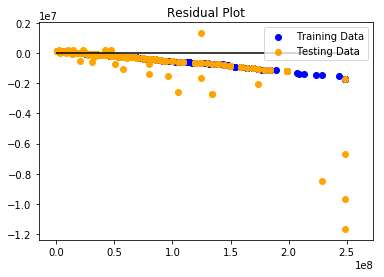

MSE: 403933003233.9509, R2: 0.9997266766197284


In [14]:
# Plot the Residuals for the Training and Testing data
### BEGIN SOLUTION

predictions2 = np.expand_dims(gbr.predict(X_test), axis = 1)
plt.scatter((np.expand_dims(gbr.predict(X_train), axis = 1)), (np.expand_dims(gbr.predict(X_train), axis = 1)) - y_train, c="blue", label="Training Data")
plt.scatter(predictions2, predictions2 - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

MSE = mean_squared_error(y_test, predictions2)
r2 = gbr.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

In [15]:
new_budget_output_test.to_csv("new_budget_output_test.csv", index=False)